# Language Processing

#### Primo Obiettivo: data una stringa di testo, contiamo quante volte una parola unica appare. Useremo per questo un dizionario, con key = parola e value = n. volte occorsa

In [2]:
text = "This is my test text. We're keeping this text short to keep things manageable."

In [3]:
def count_words(text):
    
    """ 
    Count the number of times each word occurs in text (str). Return dictionary
    where keys are unique words and values are word counts. Skip punctuation.
    """
    
    text = text.lower()
    skips = [".", ",", ";", ":", "''", '""']
    
    for ch in skips:
        text = text.replace(ch, " ")
    
       
    word_counts = {}
    
    #dividiamo il text sulla base degli spazi
    for word in text.split(" "):
        
        # se abbiamo già incontrato la parola, incrementiamo il valore di 1
        if word in word_counts:
            word_counts[word] += 1
        
        # se la parola è nuova, introduciamola nel dizionario e impostiamo il valore a 1 
        else:
            word_counts[word] = 1
    
    return word_counts

In [4]:
count_words(text)

{'this': 2,
 'is': 1,
 'my': 1,
 'test': 1,
 'text': 2,
 '': 2,
 "we're": 1,
 'keeping': 1,
 'short': 1,
 'to': 1,
 'keep': 1,
 'things': 1,
 'manageable': 1}

In [7]:
# In alternativa, usiamo la funzione COUNTER
from collections import Counter

def count_words_fast(text):
    
    """ 
    Count the number of times each word occurs in text (str). Return dictionary
    where keys are unique words and values are word counts. Skip punctuation.
    """
    
    text = text.lower()
    skips = [".", ",", ";", ":", "''", '""']
    
    for ch in skips:
        text = text.replace(ch, " ")
    
    word_counts = Counter(text.split(" "))
       
    return word_counts


In [8]:
count_words_fast(text)

Counter({'this': 2,
         'is': 1,
         'my': 1,
         'test': 1,
         'text': 2,
         '': 2,
         "we're": 1,
         'keeping': 1,
         'short': 1,
         'to': 1,
         'keep': 1,
         'things': 1,
         'manageable': 1})

#### Carichiamo in memoria il contenuto di un file testuale presente in locale e ne analizziamo il contenuto.

In [9]:
def read_book(title_path):
  
    """Read a book and return it as a string."""
    
    with open(title_path, "r", encoding="utf8") as current_file:
        text =  current_file.read()
        text = text.replace("\n", "").replace("\r", "")
    return text

In [14]:
text = read_book(".\Books\English\shakespeare\Romeo and Juliet.txt")

In [15]:
len(text)

169275

In [16]:
# Usiamo la funzione .FIND() per trovere una parte della stringa
# Restituisce l'indice se trova corrispondenza.
    
ind = text.find("What's in a name?")

In [17]:
ind

42757

In [18]:
# estraiamo allora dall'indice 42757 i primi mille caratteri.

sample_text = text[ind : ind + 1000]

In [19]:
sample_text

"What's in a name? That which we call a rose    By any other name would smell as sweet.    So Romeo would, were he not Romeo call'd,    Retain that dear perfection which he owes    Without that title. Romeo, doff thy name;    And for that name, which is no part of thee,    Take all myself.  Rom. I take thee at thy word.    Call me but love, and I'll be new baptiz'd;    Henceforth I never will be Romeo.  Jul. What man art thou that, thus bescreen'd in night,    So stumblest on my counsel?  Rom. By a name    I know not how to tell thee who I am.    My name, dear saint, is hateful to myself,    Because it is an enemy to thee.    Had I it written, I would tear the word.  Jul. My ears have yet not drunk a hundred words    Of that tongue's utterance, yet I know the sound.    Art thou not Romeo, and a Montague?  Rom. Neither, fair saint, if either thee dislike.  Jul. How cam'st thou hither, tell me, and wherefore?    The orchard walls are high and hard to climb,    And the place death, consid

#### Scriviamo alcune funzioni per l'analisi del testo.

In [20]:
def word_stats(word_counts):
    
    #count unique words, la funzione sopra restituisce un dizionario con elementi unici
    num_unique = len(word_counts)
    
    # restituire la freq. di ogni singola parola unica occorsa
    counts = word_counts.values()
    
    # risultati, in una tupla
    return (num_unique, counts)
    

In [22]:
text = read_book(".\Books\English\shakespeare\Romeo and Juliet.txt")

In [23]:
word_counts = count_words(text) #dopo aver usato la f. di lettura, applico quella di conteggio e creazione dizionario

In [24]:
(num_unique, counts) = word_stats(word_counts)

In [25]:
num_unique

5163

In [26]:
sum(counts)

46565

In [30]:
#comparazione tra l'edizione ENG e quella DE

#Inglese 
text = read_book(".\Books\English\shakespeare\Romeo and Juliet.txt")
word_counts = count_words(text)
(num_unique, counts) = word_stats(word_counts)
print(num_unique, sum(counts))

#Tedesco 
text = read_book(".\Books\German\shakespeare\Romeo und Julia.txt")
word_counts = count_words(text)
(num_unique, counts) = word_stats(word_counts)
print(num_unique, sum(counts))

5163 46565
6973 24417


#### 3.2.5: Reading Multiple Files

In [32]:
# per analizzare più file in una data directory

import os

book_dir = ".\\Books"

for language in os.listdir(book_dir):
    for author in os.listdir(book_dir + "\\" + language):
        for title in os.listdir(book_dir + "\\" + language + "\\" + author):
            
            inputfile = book_dir + "\\" + language + "\\" + author + "\\" + title
            print(inputfile)
            text = read_book(inputfile)
            (num_unique, counts) = word_stats(count_words(text))

.\Books\English\shakespeare\A Midsummer Night's Dream.txt
.\Books\English\shakespeare\Hamlet.txt
.\Books\English\shakespeare\Macbeth.txt
.\Books\English\shakespeare\Othello.txt
.\Books\English\shakespeare\Richard III.txt
.\Books\English\shakespeare\Romeo and Juliet.txt
.\Books\English\shakespeare\The Merchant of Venice.txt
.\Books\German\lessing\der freigeist.txt
.\Books\German\lessing\der junge gelehrte.txt
.\Books\German\lessing\die juden.txt
.\Books\German\lessing\emilia galotti.txt
.\Books\German\lessing\hamburgische dramaturgie.txt
.\Books\German\lessing\minna von barnhelm.txt
.\Books\German\lessing\miss sara sampson.txt
.\Books\German\lessing\philotas.txt
.\Books\German\raimund\Das MÑdchen aus der Feenwelt.txt
.\Books\German\raimund\Der Alpenkînig und der Menschenfeind.txt
.\Books\German\raimund\Der Barometermacher auf der Zauberinsel.txt
.\Books\German\raimund\Der Diamant des Geisterkînigs.txt
.\Books\German\raimund\Der Verschwender.txt
.\Books\German\raimund\Die gefesselte P

## Usiamo il modulo pandas (Panel Data)

In [33]:
import pandas as pd

In [35]:
import os
import pandas as pd

book_dir = ".\\Books"

#empty DataFrame (table, 5 columns) from Pandas

stats = pd.DataFrame(columns = ("language", "author", "title", "length", "unique"))

# per riempire la tabella dobbiamo tener conto delle righe:

title_num = 1 #contatore

for language in os.listdir(book_dir):
    for author in os.listdir(book_dir + "\\" + language):
        for title in os.listdir(book_dir + "\\" + language + "\\" + author):
            
            inputfile = book_dir + "\\" + language + "\\" + author + "\\" + title
            print(inputfile)
            text = read_book(inputfile)
            (num_unique, counts) = word_stats(count_words(text))

            #aggiungiamo una riga per riempire la tabella:
            
            stats.loc[title_num] = language, author.capitalize(), title.replace(".txt",""), sum(counts), num_unique
            
            #incrementiamo il contatore per la tabella
            title_num += 1

.\Books\English\shakespeare\A Midsummer Night's Dream.txt
.\Books\English\shakespeare\Hamlet.txt
.\Books\English\shakespeare\Macbeth.txt
.\Books\English\shakespeare\Othello.txt
.\Books\English\shakespeare\Richard III.txt
.\Books\English\shakespeare\Romeo and Juliet.txt
.\Books\English\shakespeare\The Merchant of Venice.txt
.\Books\German\lessing\der freigeist.txt
.\Books\German\lessing\der junge gelehrte.txt
.\Books\German\lessing\die juden.txt
.\Books\German\lessing\emilia galotti.txt
.\Books\German\lessing\hamburgische dramaturgie.txt
.\Books\German\lessing\minna von barnhelm.txt
.\Books\German\lessing\miss sara sampson.txt
.\Books\German\lessing\philotas.txt
.\Books\German\raimund\Das MÑdchen aus der Feenwelt.txt
.\Books\German\raimund\Der Alpenkînig und der Menschenfeind.txt
.\Books\German\raimund\Der Barometermacher auf der Zauberinsel.txt
.\Books\German\raimund\Der Diamant des Geisterkînigs.txt
.\Books\German\raimund\Der Verschwender.txt
.\Books\German\raimund\Die gefesselte P

In [36]:
stats

language       author                                              title  \
1   English  Shakespeare                          A Midsummer Night's Dream   
2   English  Shakespeare                                             Hamlet   
3   English  Shakespeare                                            Macbeth   
4   English  Shakespeare                                            Othello   
5   English  Shakespeare                                        Richard III   
6   English  Shakespeare                                   Romeo and Juliet   
7   English  Shakespeare                             The Merchant of Venice   
8    German      Lessing                                      der freigeist   
9    German      Lessing                                 der junge gelehrte   
10   German      Lessing                                          die juden   
11   German      Lessing                                     emilia galotti   
12   German      Lessing                           hamburgische dramaturgie   
13   German      Lessing                                 minna von barnhelm   
14   German      Lessing                                  miss sara sampson   
15   German      Lessing                                           philotas   
16   German      Raimund                      Das MÑdchen aus der Feenwelt   
17   German      Raimund              Der Alpenkînig und der Menschenfeind   
18   German      Raimund            Der Barometermacher auf der Zauberinsel   
19   German      Raimund                     Der Diamant des Geisterkînigs   
20   German      Raimund                                   Der Verschwender   
21   German      Raimund                           Die gefesselte Phantasie   
22   German      Raimund                          Die unheilbringende Krone   
23   German      Raimund                              Moisasurs Zauberfluch   
24   German     Schiller                                Der Neffe als Onkel   
25   German     Schiller  Der Parasit, oder die Kunst, sein GlÅck zu ma...   
26   German     Schiller                              die braut von messina   
27   German     Schiller                          Die Huldigung der KÅnste   
28   German     Schiller                           Die Jungfrau von Orleans   
29   German     Schiller                                    Die Piccolomini   
30   German     Schiller              Die Verschwîrung des Fiesco zu Genua   
31   German     Schiller                                   Kabale und Liebe   
32   German     Schiller                     Turandot, Prinzessin von China   
33   German     Schiller                                 Wallensteins Lager   
34   German     Schiller                                   Wallensteins Tod   
35   German  Shakespeare                           Der Kaufmann von Venedig   
36   German  Shakespeare                              Ein Sommernachtstraum   
37   German  Shakespeare                                             Hamlet   
38   German  Shakespeare                                            Macbeth   
39   German  Shakespeare                                            Othello   
40   German  Shakespeare                                        Richard III   
41   German  Shakespeare                                    Romeo und Julia   

    length unique  
1    16103   4345  
2    28551   6776  
3    16874   4780  
4    26590   5898  
5    54735   5501  
6    46565   5163  
7    20949   4978  
8    28340   5836  
9    33368   6821  
10   14545   3719  
11   24792   6213  
12  168565  27823  
13   28435   7219  
14   33240   6796  
15   11206   3206  
16   25219   6029  
17   26527   6356  
18   19239   5004  
19   22567   5593  
20   29962   6791  
21   20058   5499  
22   30107   6823  
23   21760   5338  
24   17390   4163  
25   24217   5884  
26   30463   6444  
27    4556   1716  
28   28572   7857  
29   39821   6458  
30   37151   9733  
31   35920   9541  
32   25556   6864  
33   17787   4395  
34  

In [37]:
#TOP FIVE
stats.head()

language       author                      title length unique
1  English  Shakespeare  A Midsummer Night's Dream  16103   4345
2  English  Shakespeare                     Hamlet  28551   6776
3  English  Shakespeare                    Macbeth  16874   4780
4  English  Shakespeare                    Othello  26590   5898
5  English  Shakespeare                Richard III  54735   5501

In [38]:
#BOTTOM FIVE
stats.tail()

language       author            title length unique
37   German  Shakespeare           Hamlet  38646   8882
38   German  Shakespeare          Macbeth  23764   6297
39   German  Shakespeare          Othello  20149   6380
40   German  Shakespeare      Richard III  32668   7773
41   German  Shakespeare  Romeo und Julia  24417   6973

#### Grafichiamo alcune satistiche dei file di testo letti

In [39]:
stats.length

1      16103
2      28551
3      16874
4      26590
5      54735
6      46565
7      20949
8      28340
9      33368
10     14545
11     24792
12    168565
13     28435
14     33240
15     11206
16     25219
17     26527
18     19239
19     22567
20     29962
21     20058
22     30107
23     21760
24     17390
25     24217
26     30463
27      4556
28     28572
29     39821
30     37151
31     35920
32     25556
33     17787
34     57206
35     25514
36     20452
37     38646
38     23764
39     20149
40     32668
41     24417
Name: length, dtype: object

In [40]:
stats.author

1     Shakespeare
2     Shakespeare
3     Shakespeare
4     Shakespeare
5     Shakespeare
6     Shakespeare
7     Shakespeare
8         Lessing
9         Lessing
10        Lessing
11        Lessing
12        Lessing
13        Lessing
14        Lessing
15        Lessing
16        Raimund
17        Raimund
18        Raimund
19        Raimund
20        Raimund
21        Raimund
22        Raimund
23        Raimund
24       Schiller
25       Schiller
26       Schiller
27       Schiller
28       Schiller
29       Schiller
30       Schiller
31       Schiller
32       Schiller
33       Schiller
34       Schiller
35    Shakespeare
36    Shakespeare
37    Shakespeare
38    Shakespeare
39    Shakespeare
40    Shakespeare
41    Shakespeare
Name: author, dtype: object

In [41]:
import matplotlib.pyplot as plt

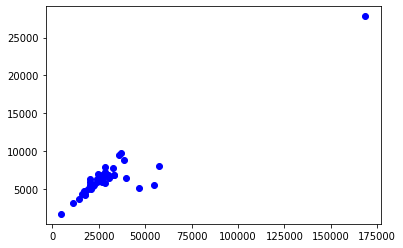

In [42]:
plt.plot(stats.length, stats.unique, "bo"); #x, y

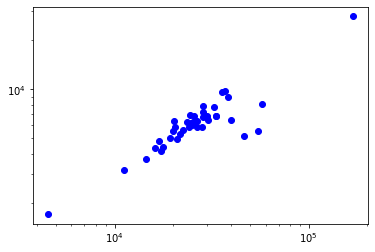

In [43]:
plt.loglog(stats.length, stats.unique, "bo"); #x, y

In [44]:
stats[stats.language == "English"]

language       author                      title length unique
1  English  Shakespeare  A Midsummer Night's Dream  16103   4345
2  English  Shakespeare                     Hamlet  28551   6776
3  English  Shakespeare                    Macbeth  16874   4780
4  English  Shakespeare                    Othello  26590   5898
5  English  Shakespeare                Richard III  54735   5501
6  English  Shakespeare           Romeo and Juliet  46565   5163
7  English  Shakespeare     The Merchant of Venice  20949   4978

In [45]:
stats[stats.language == "German"]

language       author                                              title  \
8    German      Lessing                                      der freigeist   
9    German      Lessing                                 der junge gelehrte   
10   German      Lessing                                          die juden   
11   German      Lessing                                     emilia galotti   
12   German      Lessing                           hamburgische dramaturgie   
13   German      Lessing                                 minna von barnhelm   
14   German      Lessing                                  miss sara sampson   
15   German      Lessing                                           philotas   
16   German      Raimund                      Das MÑdchen aus der Feenwelt   
17   German      Raimund              Der Alpenkînig und der Menschenfeind   
18   German      Raimund            Der Barometermacher auf der Zauberinsel   
19   German      Raimund                     Der Diamant des Geisterkînigs   
20   German      Raimund                                   Der Verschwender   
21   German      Raimund                           Die gefesselte Phantasie   
22   German      Raimund                          Die unheilbringende Krone   
23   German      Raimund                              Moisasurs Zauberfluch   
24   German     Schiller                                Der Neffe als Onkel   
25   German     Schiller  Der Parasit, oder die Kunst, sein GlÅck zu ma...   
26   German     Schiller                              die braut von messina   
27   German     Schiller                          Die Huldigung der KÅnste   
28   German     Schiller                           Die Jungfrau von Orleans   
29   German     Schiller                                    Die Piccolomini   
30   German     Schiller              Die Verschwîrung des Fiesco zu Genua   
31   German     Schiller                                   Kabale und Liebe   
32   German     Schiller                     Turandot, Prinzessin von China   
33   German     Schiller                                 Wallensteins Lager   
34   German     Schiller                                   Wallensteins Tod   
35   German  Shakespeare                           Der Kaufmann von Venedig   
36   German  Shakespeare                              Ein Sommernachtstraum   
37   German  Shakespeare                                             Hamlet   
38   German  Shakespeare                                            Macbeth   
39   German  Shakespeare                                            Othello   
40   German  Shakespeare                                        Richard III   
41   German  Shakespeare                                    Romeo und Julia   

    length unique  
8    28340   5836  
9    33368   6821  
10   14545   3719  
11   24792   6213  
12  168565  27823  
13   28435   7219  
14   33240   6796  
15   11206   3206  
16   25219   6029  
17   26527   6356  
18   19239   5004  
19   22567   5593  
20   29962   6791  
21   20058   5499  
22   30107   6823  
23   21760   5338  
24   17390   4163  
25   24217   5884  
26   30463   6444  
27    4556   1716  
28   28572   7857  
29   39821   6458  
30   37151   9733  
31   35920   9541  
32   25556   6864  
33   17787   4395  
34   57206   8067  
35   25514   6249  
36   20452   5896  
37   38646   8882  
38   23764   6297  
39   20149   6380  
40   32668   7773  
41   24417   6973

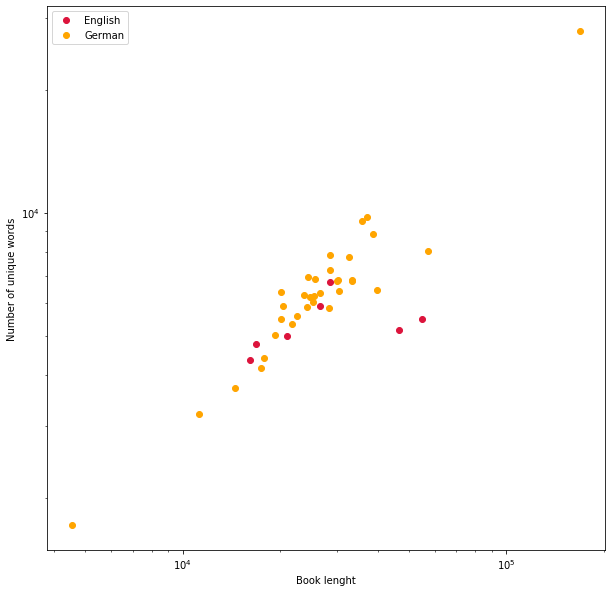

In [47]:
#COLORS, in HTML colors
plt.figure(figsize = (10,10))
subset = stats[stats.language == "English"]
plt.loglog(subset.length, subset.unique, "o", label = "English", color = "crimson")

subset = stats[stats.language == "German"]
plt.loglog(subset.length, subset.unique, "o", label = "German", color = "orange")

plt.legend()
plt.xlabel("Book lenght")
plt.ylabel("Number of unique words")

plt.savefig("lang_plot.pdf")
